In [9]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
import statsmodels.api as sm
from scipy.stats import t 

In [35]:
df = pd.read_csv('edu.csv') 
df.tail()
df.columns


Index(['Education', 'Income', 'Millenial'], dtype='str')

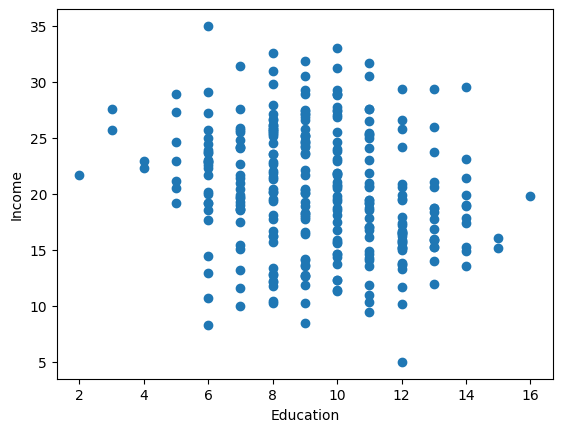

In [ ]:
plt.scatter(df['Education'], df['Income']) 
plt.xlabel('Education') 
plt.ylabel('Income') 
plt.show() 


In [16]:
# Regression of Income on Education  
model = sm.OLS(df['Income'], sm.add_constant(df['Education'])) 
results = model.fit() 
print(results.summary()) 


                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     16.41
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           6.50e-05
Time:                        21:40:32   Log-Likelihood:                -929.48
No. Observations:                 300   AIC:                             1863.
Df Residuals:                     298   BIC:                             1870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2100      1.239     20.344      0.0

In [ ]:
# (c) Is there evidence that the slope coefficient on Education is less than -0.1? Conduct your test
# at α = 0.05.
t_stat = (results.params['Education'] + 0.1) / results.bse['Education']
p_value = t.cdf(t_stat, results.df_resid)
print(round(p_value, 2))
print(f"The p-value is {p_value:.2f}, so we reject the null hypothesis that the slope coefficient on Education is greater than or equal to -0.1.")
print("Therefore, we conclude that there is evidence that the slope coefficient is less than -0.1.")


0.0
The p-value is 0.00, so we reject the null hypothesis that the slope coefficient on Education is greater than or equal to -0.1.
Therefore, we conclude that there is evidence that the slope coefficient is less than -0.1.


In [ ]:
# (d) Analysis II: Multiple regression with Education, Millenial, and interaction
df['Millenial'] = df['Millenial'].astype(int)
df['Education_x_Millenial'] = df['Education'] * df['Millenial']
df[["Millenial", "Education_x_Millenial"]]

model2 = sm.OLS(df['Income'], sm.add_constant(df[['Education', 'Millenial', 'Education_x_Millenial']]))
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     128.3
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           2.86e-53
Time:                        22:18:04   Log-Likelihood:                -812.53
No. Observations:                 300   AIC:                             1633.
Df Residuals:                     296   BIC:                             1648.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    21.12

In [47]:
# (e) Prediction equations
print("Regression equation on millenials: ")
print(f"Income = {results2.params['const']:.3f} + {results2.params['Education']:.3f}*Education + {results2.params['Millenial']:.3f}*1 + {results2.params['Education_x_Millenial']:.3f}*Education*1")
print(f"       = {results2.params['const'] + results2.params['Millenial']:.3f} + ({results2.params['Education'] + results2.params['Education_x_Millenial']:.3f})*Education")
print("\nRegression equation on non-millenials: ")
print(f"Income = {results2.params['const']:.4f} + {results2.params['Education']:.4f}*Education")

Regression equation on millenials: 
Income = 21.130 + 0.399*Education + -8.153*1 + -0.086*Education*1
       = 12.977 + (0.313)*Education

Regression equation on non-millenials: 
Income = 21.1297 + 0.3990*Education


In [45]:
# (f) Test difference in expected income between non-Millenials with 8 vs 7 years > $100
# difference in income = (const + Education*8) - (const + Education*7) = Education
diff = results2.params['Education']
se_diff = results2.bse['Education']
t_stat = (diff - 0.1) / se_diff
p_value = 1 - t.cdf(t_stat, results2.df_resid)
print(f"p-value: {p_value:.4f}")
print(f"Since p-value = {p_value:.4f} < 0.05, we reject the null hypothesis that the difference in expected income")
print("between non-Millenials with 8 years vs 7 years of education is less than $100.")
print("Therfore, there is evidence (at α = 0.05) that the difference in expected income")
print("between non-Millenials with 8 years vs 7 years of education is greater than $100.")

p-value: 0.0205
Since p-value = 0.0205 < 0.05, we reject the null hypothesis that the difference in expected income
between non-Millenials with 8 years vs 7 years of education is less than $100.
Therfore, there is evidence (at α = 0.05) that the difference in expected income
between non-Millenials with 8 years vs 7 years of education is greater than $100.


In [49]:
# (g) 90% CI for difference between slope coefficients of education between Millenials and non-Millenials
# Difference = (Education + Education_x_Millenial) - Education = Education_x_Millenial
diff_slope = results2.params['Education_x_Millenial']
se_diff_slope = results2.bse['Education_x_Millenial']
t_crit = t.ppf(0.95, results2.df_resid)
ci_lower = diff_slope - t_crit * se_diff_slope
ci_upper = diff_slope + t_crit * se_diff_slope
print(f"[{ci_lower:.4f}, {ci_upper:.4f}]")

[-0.4120, 0.2401]


In [51]:
# (h) Does Analysis II improve over model with no predictors?
# H0: all slope coefficients = 0 vs H1: at least one ≠ 0
# F = (explained variance) / (unexplained variance)
# F p-value: probability of observing this F if H0 is true
print(f"F-statistic: {results2.fvalue:.4f}")
print(f"F p-value: {results2.f_pvalue:.4f}")
print(f"Since p-value < 0.05, Analysis II significantly improves over a model with no predictors.")

F-statistic: 128.3493
F p-value: 0.0000
Since p-value < 0.05, Analysis II significantly improves over a model with no predictors.


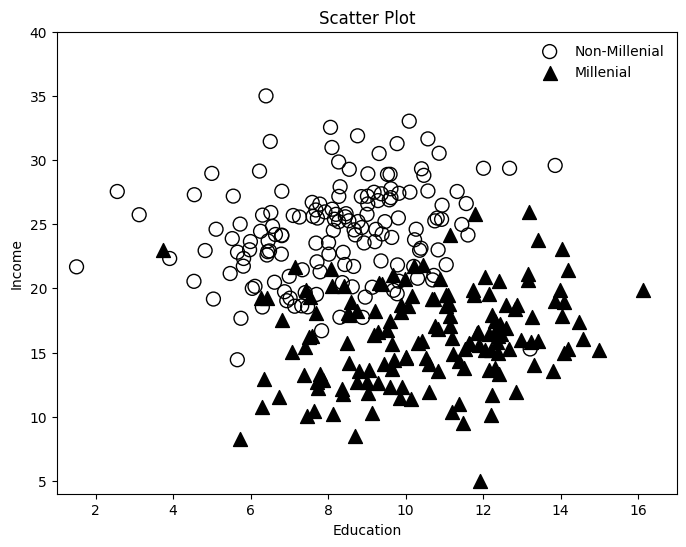

In [ ]:
# (j) Plot exactly matching R code
df_plot = pd.read_csv('edu.csv')
Education = df_plot['Education']
Income = df_plot['Income']
Millenial = df_plot['Millenial'] 

plt.figure(figsize=(8, 6))
plt.xlim(Education.min() - 1, Education.max() + 1)
plt.ylim(4, 40)
plt.title("Scatter Plot")
plt.xlabel("Education")
plt.ylabel("Income")

np.random.seed(42)  
jitter_amount = 1

non_mill_idx = ~Millenial
edu_nm = Education[non_mill_idx].values  
edu_jitter_nm = edu_nm + np.random.uniform(-jitter_amount/2, jitter_amount/2, len(edu_nm))
inc_nm = Income[non_mill_idx].values
plt.scatter(edu_jitter_nm, inc_nm, marker='o', s=100, facecolors='none', edgecolors='black', linewidths=1, label='Non-Millenial')

mill_idx = Millenial
edu_m = Education[mill_idx].values  
edu_jitter_m = edu_m + np.random.uniform(-jitter_amount/2, jitter_amount/2, len(edu_m))
inc_m = Income[mill_idx].values
plt.scatter(edu_jitter_m, inc_m, marker='^', s=100, color='black', label='Millenial')

plt.legend(loc='upper right', frameon=False, fontsize=10)
plt.show()